In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
data = pd.read_csv("S02-hw-dataset.csv")
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [3]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [4]:
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [5]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [6]:
p = data[data["purchases"]<0]
print(p)
p=data[data["revenue"]<0]
print(p)
p=data[data["age"]>=100]
print(p)
p = data[(data["revenue"] == 0) & (data["purchases"] > 0)]
print(p)
print(''' Мы поверели 4 условия и видно где purchases < 0, что revenue < 0 отсутсвует во всем датафрейме, 
где возрвст аномальный(совпадает с purchases < 0), 
а также проверили где покупки > 0 а доход равен нулю чего быть не можетю ''')

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0
 Мы поверели 4 условия и видно где purchases < 0, что revenue < 0 отсутсвует во всем датафрейме, 
где возрвст аномальный(совпадает с purchases < 0), 
а также проверили где покупки > 0 а доход равен нулю чего быть не можетю 


In [7]:
data.value_counts("country")

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [8]:
g = data.groupby("country")
print(g.age.agg(['max', 'min', 'mean']))
print('''Мы раздили на группу по country и вычислили для каждой страны минимальный максимальный и средний возраст''')

           max   min       mean
country                        
CN        28.0  20.0  24.000000
DE        52.0  18.0  34.600000
FR       120.0  22.0  46.250000
RU        54.0   5.0  30.076923
US        51.0  23.0  36.714286
Мы раздили на группу по country и вычислили для каждой страны минимальный максимальный и средний возраст


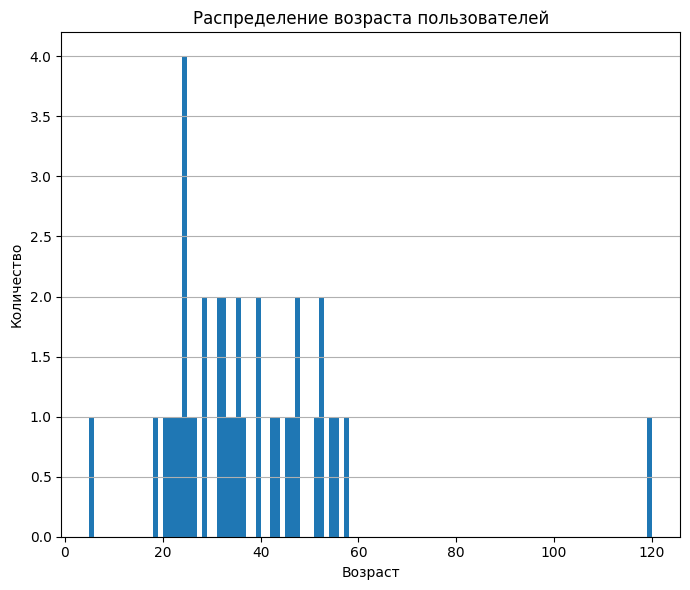

In [9]:
df = data.dropna(subset=['age']).drop_duplicates()
x = df['age'].values
fig, ax = plt.subplots(figsize=(7, 6))
ax.hist(
    x, 
    bins=np.arange(x.min(), x.max()+1)
)
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество')
ax.set_title('Распределение возраста пользователей')

ax.grid(axis='y')
plt.tight_layout()
plt.savefig(r"C:\Users\djako\OneDrive\Рабочий стол\Инженерия Искусственного Интеллекта\-\homeworks\HW02\figures\hist.png")

plt.show()

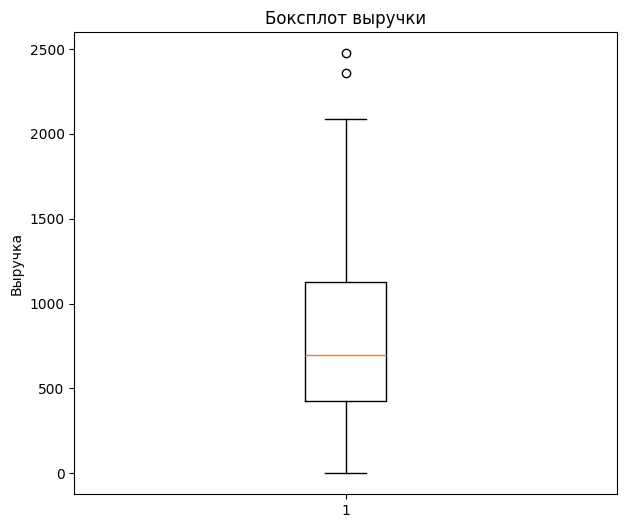

In [10]:

df = data.dropna(subset=['revenue']).drop_duplicates()
fig, ax = plt.subplots(figsize=(7, 6))
ax.boxplot(df['revenue'])
ax.set_title('Боксплот выручки')
ax.set_ylabel('Выручка')
plt.savefig(r"C:\Users\djako\OneDrive\Рабочий стол\Инженерия Искусственного Интеллекта\-\homeworks\HW02\figures\boxplot.png")

plt.show()

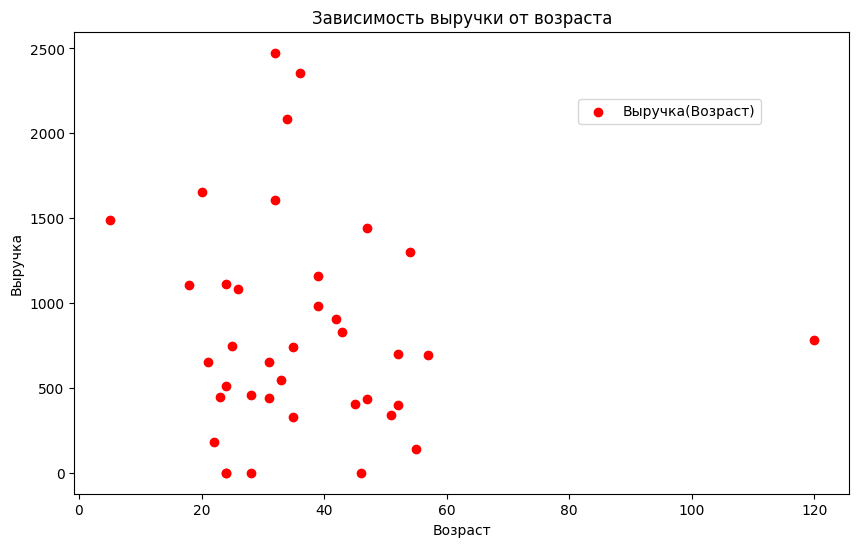

In [11]:

df = data.dropna(subset=['revenue']).drop_duplicates().dropna(subset=['age'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['age'], df['revenue'], label = "Выручка(Возраст)", color = 'r')
ax.set_xlabel('Возраст')
ax.set_ylabel('Выручка')
ax.set_title('Зависимость выручки от возраста')
ax.legend(loc=(0.65, 0.8)) #
plt.savefig(r"C:\Users\djako\OneDrive\Рабочий стол\Инженерия Искусственного Интеллекта\-\homeworks\HW02\figures\scatter.png")
plt.show()